<img src="coverimg.png">

# We're going to take the following approach:

1. Problem Defination
2. Data & Importing Required Libraries
3. Features
4. Loading the data & Data Preprocessing(Exploratory data analysis)
5. Dealing with Outliers. 
6. Univariate Analysis
7. Multivariate Analysis
8. Modelling
9. Prediction
10. Final Summary

## 1. Problem defination

In a given statement,
> Perform exploratory data analysis, and univariate and multivariate analysis.

## 2. Data

Cubic zirconia (CZ) is the cubic crystalline form of zirconium dioxide (ZrO2). The synthesized material is hard and usually colorless, but may be made in a variety of different colors. It should not be confused with zircon, which is a zirconium silicate (ZrSiO4). It is sometimes erroneously called cubic zirconium. Because of its low cost, durability, and close visual likeness to diamond, synthetic cubic zirconia has remained the most gemologically and economically important competitor for diamonds since commercial production began in 1976.

**Data set:** /kaggle/input/gemstone-price-prediction/cubic_zirconia.csv 

**Data dictionary:** /kaggle/input/gemstone-price-prediction/data dictionary.xlsx


## 3. Features

This is where you'll get different information about each of the features in your data.

Only 11 attributes used:

1. Carat - Carat weight of the cubic zirconia.

2. Cut - Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

3. Color - Colour of the cubic zirconia. With D being the best and J the worst.

4. Clarity - Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

5. Depth - The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

6. Table - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

7. Price - tThe Price of the cubic zirconia.

8. X - Length of the cubic zirconia in mm.

9. Y - Width of the cubic zirconia in mm.

10. Z - Height of the cubic zirconia in mm.

## 4. Loading the data & Data Preprocessing (Exploratory data analysis)

## 5. Dealing with Outliers.


## 6. Univariate Analysis

## 7. Multivariate Analysis


## 8. Modelling

1. Using Linear Regression Alogrithm

2. Using RandomForest Alogrithm

## 9. Prediction

# Importing the Libraries

In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys 
import os
import utils
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("whitegrid")

# Loading the data 

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# Remove column name 'Unnamed: 0'
df=df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head(5).style.background_gradient(cmap='Greens',axis=None)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.300000,Ideal,E,SI1,62.100000,58.000000,4.270000,4.290000,2.660000,499
1,0.330000,Premium,G,IF,60.800000,58.000000,4.420000,4.460000,2.700000,984
2,0.900000,Very Good,E,VVS2,62.200000,60.000000,6.040000,6.120000,3.780000,6289
3,0.420000,Ideal,F,VS1,61.600000,56.000000,4.820000,4.800000,2.960000,1082
4,0.310000,Ideal,F,VVS1,60.400000,59.000000,4.350000,4.430000,2.650000,779


## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve ?
2. What kind of data do we have and how do we work with different types
3. What's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data ?

In [6]:
# Data types of the data set

df.dtypes 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

**`Observation:`**
Here we can understand what are the datatypes of columns present

In [7]:
# Shape of the data set

df.shape 

(26967, 10)

**`Observation`**: Rows and Columns present in the data, we have 26967 Rows and 11 Columns present in the data 

In [8]:
df.describe().style.background_gradient(cmap='Greens',axis=None)

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


**`Observation`**:  Statiscal Analysis Of the Dataset

In [9]:
# Structure of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


**`Observation`**: This prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage

In [10]:
# Columns of the data set

df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [11]:
# Number of Null Values

df.isnull().sum() 

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

**`Observation`**: **isnull()** function helps us to check null values in our data set

In [12]:
# B. Number of Zeros

print((df == 0).sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          3
z          9
price      0
dtype: int64


In [13]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

**`Observation`**: Dealing with a missing values is a major task in data science.

Here, I have used **fillna()** function to fill the null values with the mean

In [14]:
df.isnull().sum() 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**`Observation`**: As you can see that we have zero null values now in our dataset
    

In [15]:
df.duplicated().sum() #Checking for Duplicate values

34

**`Observation`**: By using **duplicated()** function we can can check if we have any duplicate values in our datasets

In [16]:
# Precision & scale of numeric columns

# function of precision and scale


def precision_and_scale(x):
    a = x
    if isinstance(a, int) :
        if a > 0 :
            precision = len(str(a))
            scale = 0
            return precision, scale
        else:
            precision = 0
            scale = 0

    else:
        if a < 1:
            precision = 0
            scales = str(a).split('.')
        else:
            precision = len(str(a).replace('.', ''))
            scales = str(a).split('.')
        
        try:
            if int(scales[1]) > 0:
                scale = len(scales[1])
            else :
                scale = 0
            
        except IndexError:
            scale = 0
        
        scales.clear()
        return precision, scale



dff1 = df.select_dtypes(include=['int32', 'int64', 'float'])
numeric_column = dff1.columns
print("\tColumns\t\tPrecision\tScale")
prec_l = []
scale_l = []
for i in range(0, len(numeric_column)-1):
    prec_l.clear()
    scale_l.clear()
    for j in dff1[numeric_column[i]]:
        precision, scale = precision_and_scale(j)
        prec_l.append(precision)
        scale_l.append(scale)
    txt = "{:>10}{:>10}{:>10}"
    print(txt.format(numeric_column[i], precision, scale))


	Columns		Precision	Scale
     carat         3         2
     depth         3         0
     table         3         0
         x         2         1
         y         3         2
         z         3         2


In [17]:
# Replace Zero Values with siuitable statistical value of the column Give Reason Why

print("Total No. of Zeros in Columns ")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dff = df.select_dtypes(include=numerics)
print((dff == 0).sum(), "\n")
columns = dff.columns
print("Columns After applying Statistical Value")
for i in columns:
    df[i].replace(0,df[i].mean(axis=0),inplace=True)            
print((df[columns] == 0).sum())

Total No. of Zeros in Columns 
carat    0
depth    0
table    0
x        3
y        3
z        9
price    0
dtype: int64 

Columns After applying Statistical Value
carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64


In [18]:
# For Each Numeric Column

# Replace Zero Values with siuitable statistical value of the column Give Reason Why

print("Total No. of Zeros in Columns ")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dff = df.select_dtypes(include=numerics)
print((dff == 0).sum(), "\n")
columns = dff.columns
print("Columns After applying Statistical Value")
for i in columns:
    df[i].replace(0,df[i].mean(axis=0),inplace=True)            
print((df[columns] == 0).sum())

# Replace Null value with lower of mean and median value of the columns 

print("Null Values in columns")
print(dff.isnull().sum())
print("After applying lower of mean and median ")
for i in columns:
    df[i].fillna(min(df[i].mean(),df[i].median()),inplace=True)
print(df.isnull().sum())

# Provide the Quartile Summary along with the count,mean & sum.

print("Quartile Summary with count,mean & and Sum")
print(df.describe())
print(df.sum())

# Provide the range, variance and standard deviation 

print("** Range **")
print(dff.max()-dff.min())
print("\n ** Variance **")
print(df.var())
print("\n ** Standard Deviation **")
print(df.std())

# Provide the count of outliers and their values .Provide the mechanism to fix the outliers

print('\n*** Outlier Count ***')
print(utils.OutlierCount(df.select_dtypes(include=numerics)))
print('\n*** Outlier Index ***')
print(utils.OutlierIndex(df.select_dtypes(include=numerics)))
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df.select_dtypes(include=numerics)))
print('\n*** Handle Outliers ***')
dff = utils.HandleOutliers(df.select_dtypes(include=numerics))
print('\n*** Handle Outliers ***')
print(utils.OutlierCount(dff))
print('\n*** Outlier Index ***')
print(utils.OutlierIndex(dff))
print('\n*** Outlier Values ***')
print(utils.OutlierValues(dff))



Total No. of Zeros in Columns 
carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64 

Columns After applying Statistical Value
carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64
Null Values in columns
carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64
After applying lower of mean and median 
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64
Quartile Summary with count,mean & and Sum
              carat         depth         table             x             y  \
count  26967.000000  26967.000000  26967.000000  26967.000000  26967.000000   
mean       0.798375     61.745147     57.456080      5.730491      5.734207   
std        0.477745      1.394481      2.232068      1.126897      1.164488   
min        0.200000     50.800000     49.000000      3.730000      3.710000   
25%        

In [19]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


#  Univariate analysis.

In [20]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

**`Observation`**: Here we get an idea that Ideal cut has a count of 10816. Whereas, Fair cut has count of 781. 

Fair amount of our dataset has an Ideal cut

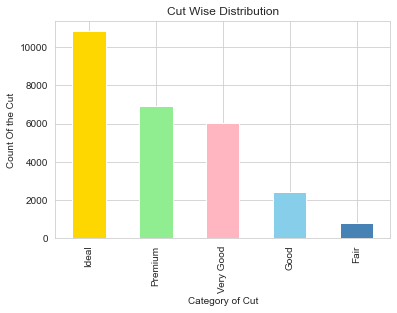

In [21]:
df['cut'].value_counts().plot(kind='bar', color=['gold', 'lightgreen','lightpink','skyblue','steelblue'], 
                              xlabel='Category of Cut', 
                              ylabel='Count Of the Cut', 
                              title='Cut Wise Distribution');

**`Observation`**: Bar Chart to represent cut wise distribution. Ideal Cut has Maximum number of count and the least count is for the Fair cut.

In [22]:
df['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

**`Observation`**: Here we get an idea that **G Color** has a count of 5661. Whereas, **J Color** has count of 1443. 


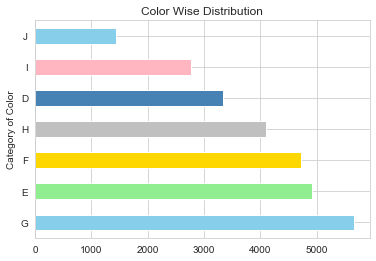

In [23]:
df['color'].value_counts().plot(kind='barh', color=['skyblue', 'lightgreen','gold','silver','steelblue','Lightpink'],
                                xlabel='Category of Color',
                                ylabel='Count Of the Color', 
                                title='Color Wise Distribution');

**`Observation`**: Horizontal Bar Chart to represent color wise distribution. **G Color** has a count of 5661. Whereas, **J Color** has count of 1443. 

In [24]:
df['clarity'].value_counts() 

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

In [25]:
df['clarity'].min() # minimum clarity

'I1'

In [26]:
df['clarity'].max() #maximum clarity

'VVS2'

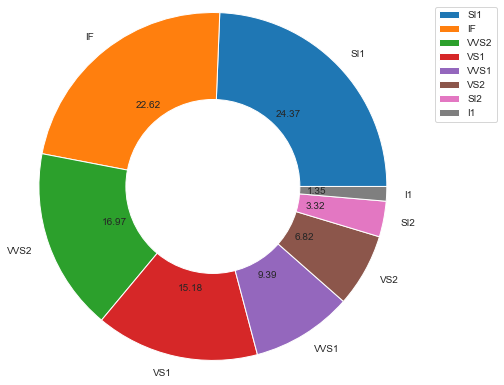

In [27]:
values=df['clarity'].value_counts()
labels=df['clarity'].unique().tolist()
explode=(0.1,0,0,0)
plt.pie(values, labels=labels, explode=None, radius=2, autopct='%.2f')
plt.legend(labels, bbox_to_anchor=(1.5,1.35), loc="upper left")
plt.axis()
my_circle=plt.Circle( (0,0), 1.0, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

**`Observation`**: A donut chart to show analysis of clarity. As, we can see Cubic Zirconia has 24.37% of SI1 Color

(-1.25, 1.25, -1.25, 1.25)

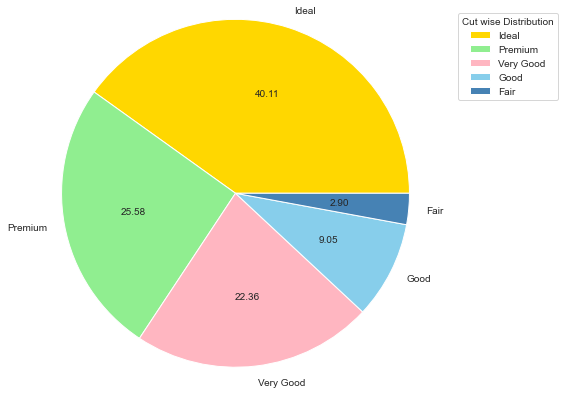

In [28]:
values=df['cut'].value_counts()
labels=df['cut'].unique().tolist()
explode=(0.1,0,0,0)
plt.pie(values, labels=labels, explode=None, radius=2, autopct='%.2f', 
        colors=['gold', 'lightgreen','lightpink','skyblue','steelblue'])
plt.legend(labels, bbox_to_anchor=(1.5,1.35), loc="upper left",title='Cut wise Distribution')
plt.axis()

**`Observation`**: A Pie chart to show analysis of Cut. As, we can see Cubic Zirconia has 40.11% of Ideal Cut

In [29]:
df['depth'].min()  # Minimum Depth

50.8

In [30]:
df['depth'].max()  # Maximum Depth

73.6


*** | Histogram | ***


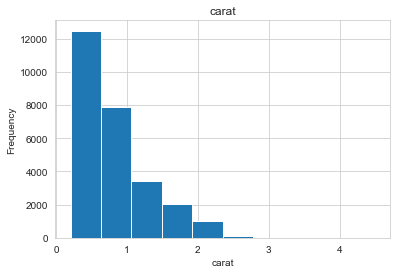

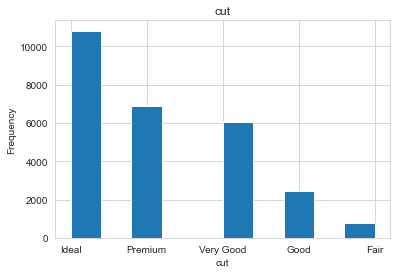

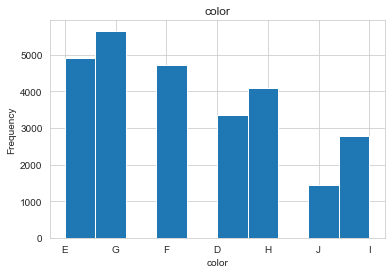

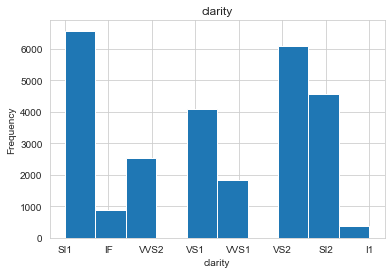

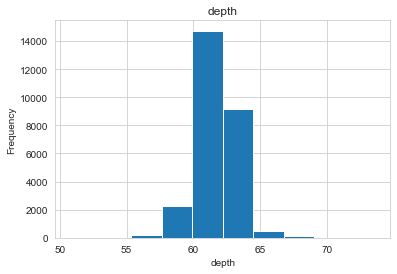

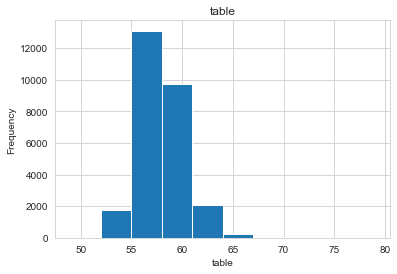

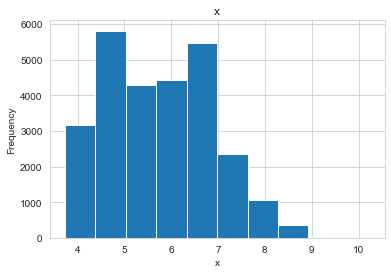

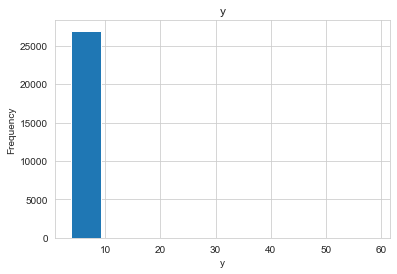

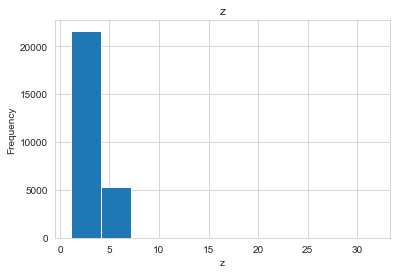

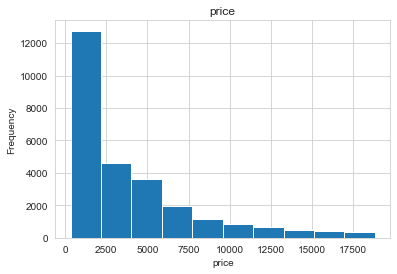

In [31]:
# histogram for all columns. 

print('\n*** | Histogram | ***')
colNames = df.columns
for column in colNames:
    df[column].hist()
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

**`Observation`**: To get an idea how's the distribution of each column present in our dataset. 

Index(['cut', 'color', 'clarity'], dtype='object')
Null values in non-numeric column
cut        0
color      0
clarity    0
dtype: int64
After applying statistical value in non numeric column 
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

*cut*
cut
Fair           781
Good          2441
Ideal        10816
Premium       6899
Very Good     6030
dtype: int64



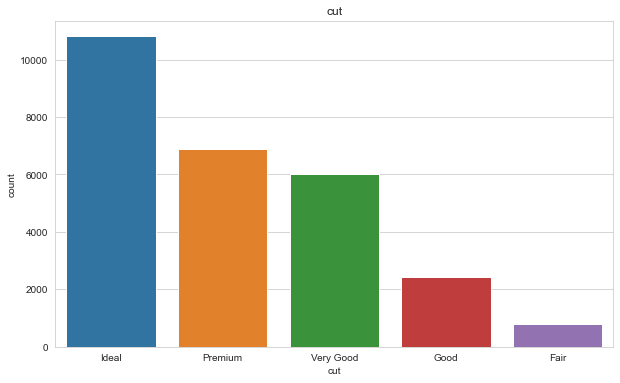


*color*
color
D    3344
E    4917
F    4729
G    5661
H    4102
I    2771
J    1443
dtype: int64



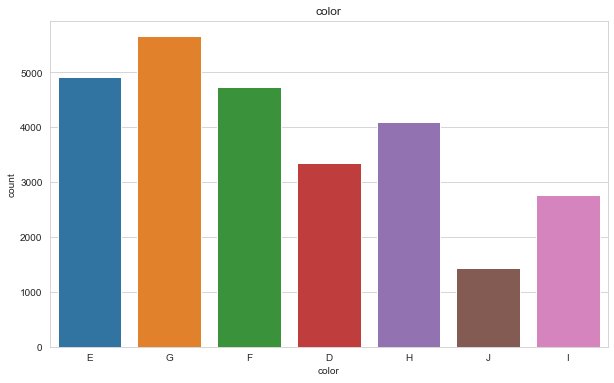


*clarity*
clarity
I1       365
IF       894
SI1     6571
SI2     4575
VS1     4093
VS2     6099
VVS1    1839
VVS2    2531
dtype: int64



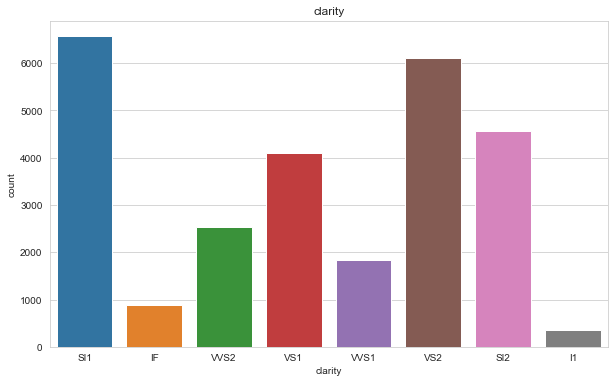

In [32]:

# Replace null values with suitable statistical value of the column.

dff = df.select_dtypes('object')
columns = dff.columns
print(columns)
print("Null values in non-numeric column")
print(dff.isnull().sum())
print("After applying statistical value in non numeric column ")
for i in columns:
    df[i].fillna(df[i].mode()[0],inplace=True)
print(df.isnull().sum())

# provide frequency distributaion table for the same

for colName in columns:
    print("\n*"+colName+"*")
    print(df.groupby(colName).size())
    print("")
    plt.figure(figsize=(10,6))
    sns.countplot(df[colName],label="Count")
    plt.title(colName)
    plt.show()

### Univariate Analysis On Cart 

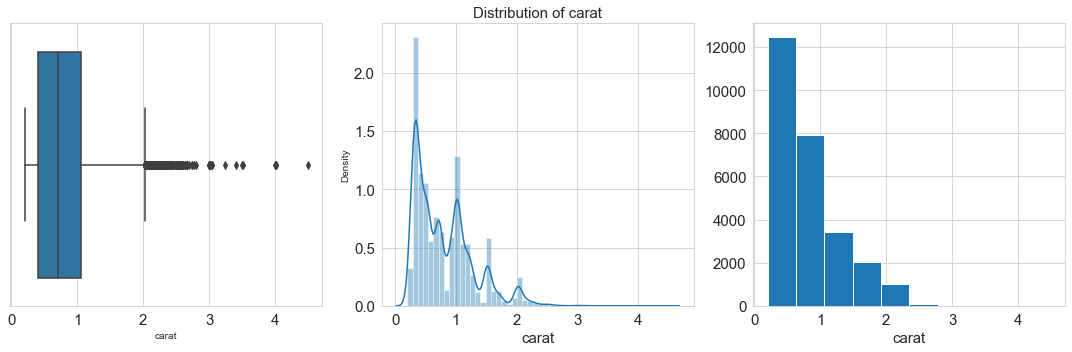

In [33]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='carat',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['carat'],ax=ax2)
ax2.set_xlabel('carat', fontsize=15)
ax2.set_title('Distribution of carat', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['carat'])
ax3.set_xlabel('carat', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Univariate Analysis On Depth 

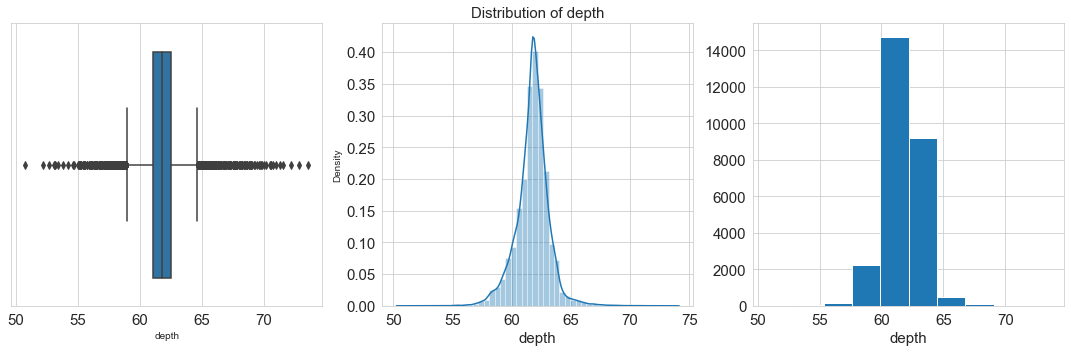

In [34]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='depth',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['depth'],ax=ax2)
ax2.set_xlabel('depth', fontsize=15)
ax2.set_title('Distribution of depth', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['depth'])
ax3.set_xlabel('depth', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

###  Univariate Analysis On Table 

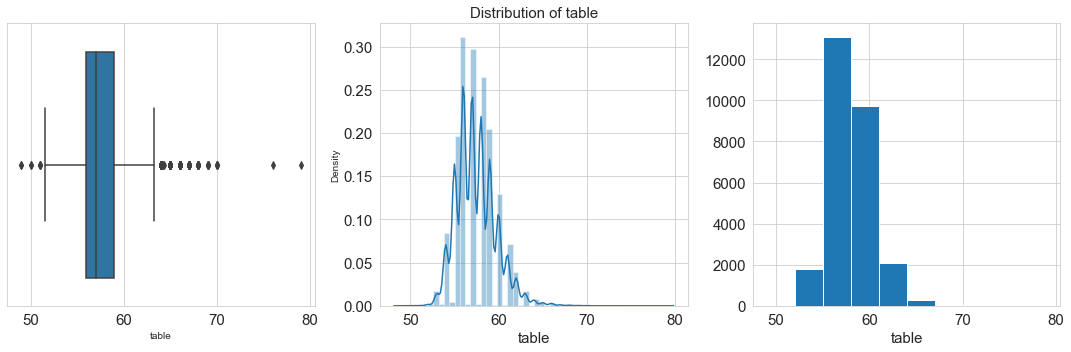

In [35]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='table',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['table'],ax=ax2)
ax2.set_xlabel('table', fontsize=15)
ax2.set_title('Distribution of table', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['table'])
ax3.set_xlabel('table', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Univariate Analysis on x,y,z

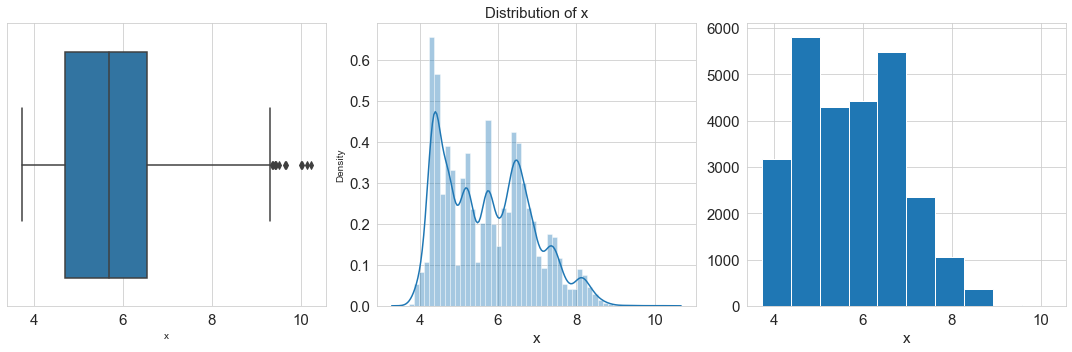

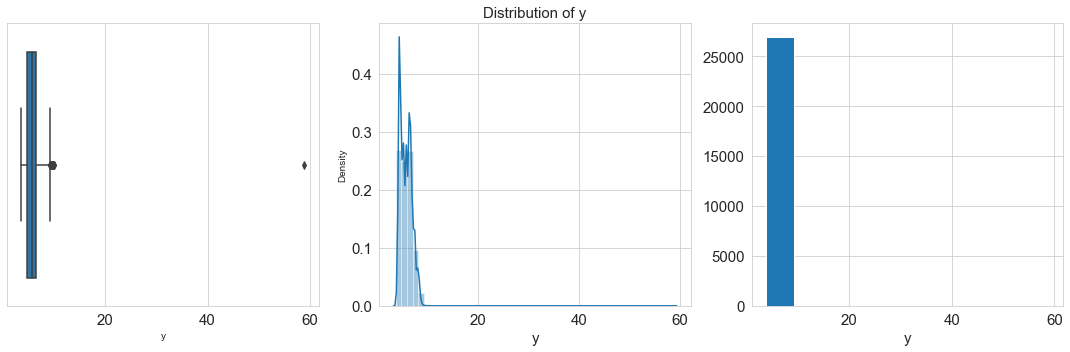

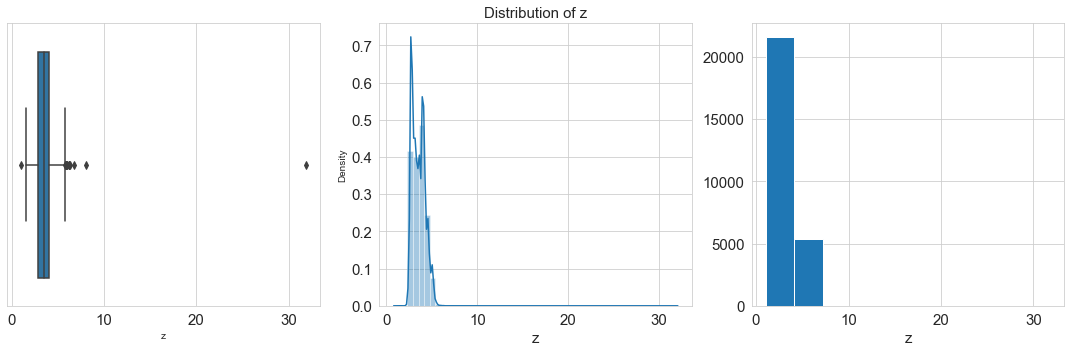

In [36]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='x',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['x'],ax=ax2)
ax2.set_xlabel('x', fontsize=15)
ax2.set_title('Distribution of x', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['x'])
ax3.set_xlabel('x', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='y',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['y'],ax=ax2)
ax2.set_xlabel('y', fontsize=15)
ax2.set_title('Distribution of y', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['y'])
ax3.set_xlabel('y', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='z',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['z'],ax=ax2)
ax2.set_xlabel('z', fontsize=15)
ax2.set_title('Distribution of z', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['z'])
ax3.set_xlabel('z', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Univariate Analysis on Price

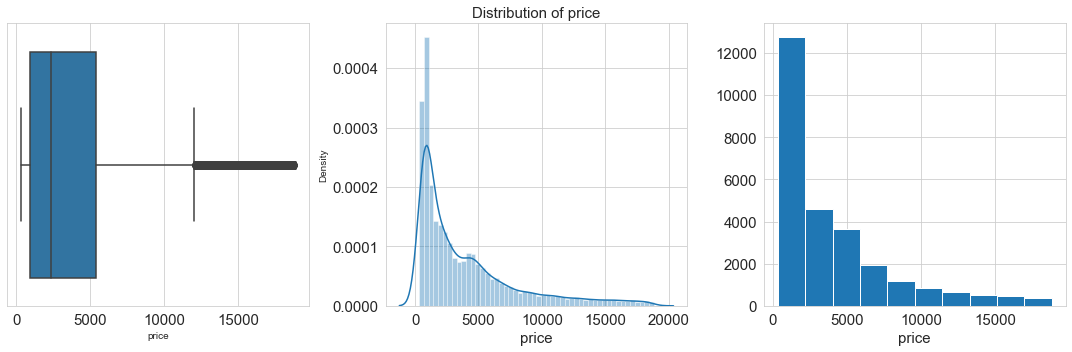

In [37]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='price',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['price'],ax=ax2)
ax2.set_xlabel('price', fontsize=15)
ax2.set_title('Distribution of price', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['price'])
ax3.set_xlabel('price', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


#  Multivariate analysis.

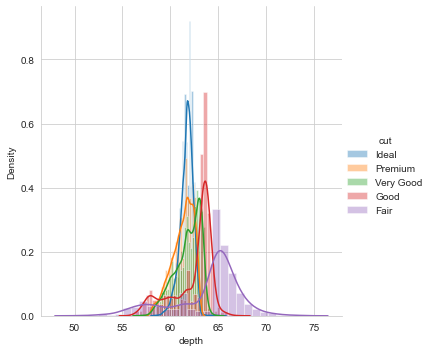

In [38]:
sns.FacetGrid(df,hue='cut',height=5).map(sns.distplot,'depth').add_legend()

**`Observation`**: Here we can see a Normal Distribution, where we Depth on X(Bar) and Cut on Y(line) 

In [39]:
numeric_cols = [col for col in df.columns if
           df[col].dtype == 'int' or df[col].dtype == 'float']

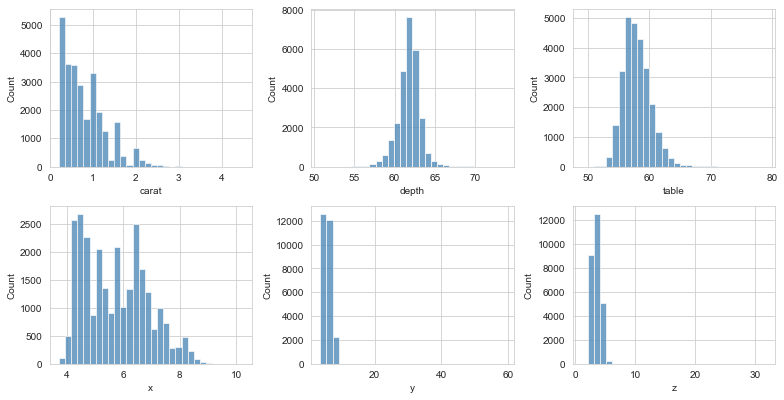

In [40]:
plt.figure(figsize = (11,8))

for i,col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.histplot( x = col, data = df, 
                 bins = 30, color = 'steelblue')
    plt.tight_layout()

<Figure size 600x400 with 0 Axes>

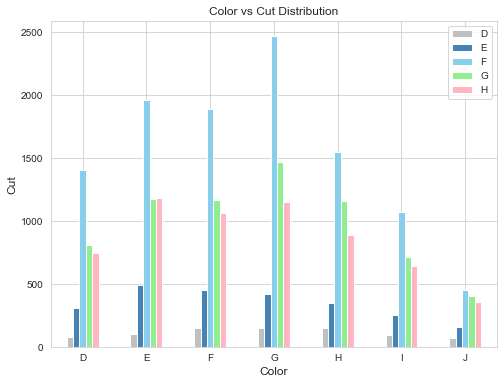

In [41]:
plt.figure(dpi=100)
pd.crosstab(df['color'], df['cut']).plot(kind='bar', figsize=(8, 6), color=['silver','steelblue','Skyblue','lightgreen','Lightpink'])
plt.title('Color vs Cut Distribution', size=12)
plt.xlabel('Color', size=12)
plt.ylabel('Cut', size=12)
plt.legend(['D','E','F','G','H','I','J'])
plt.xticks(rotation=0);

**`Observation`**: Here Color on X and Cut on Y, where color has 7 unique values so we have 7 variables on 'X' & we have 5 unique values in cut. So we can get insights accordingly.

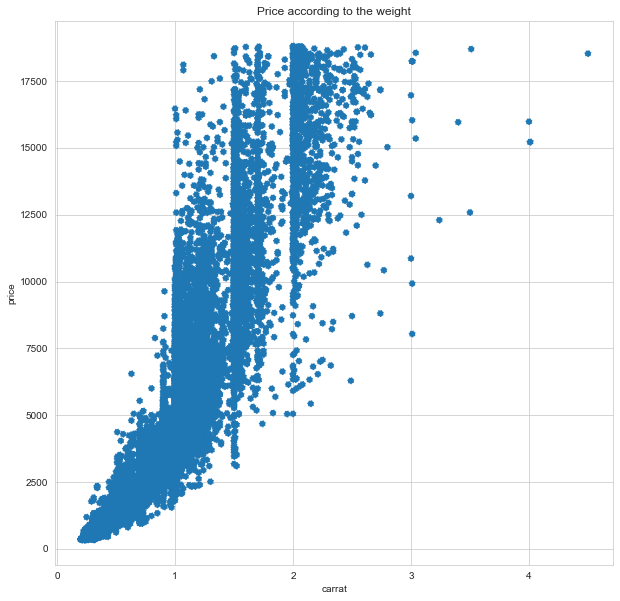

In [42]:
# Scatter plot for carat vs price

fig = plt.figure(figsize = (10,10))
plt.scatter(df['carat'],df['price'],linestyle = 'dotted')
plt.xlabel("carrat")
plt.ylabel("price")
plt.title("Price according to the weight")
plt.show()

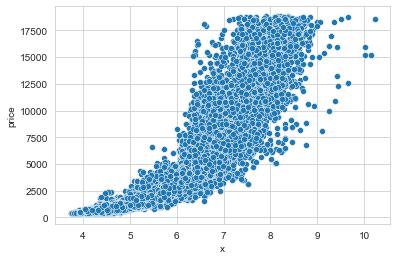

In [43]:
# Scatter plot for x vs price

sns.scatterplot(x='x', y='price', data=df)
plt.ticklabel_format(style='plain', axis='x')


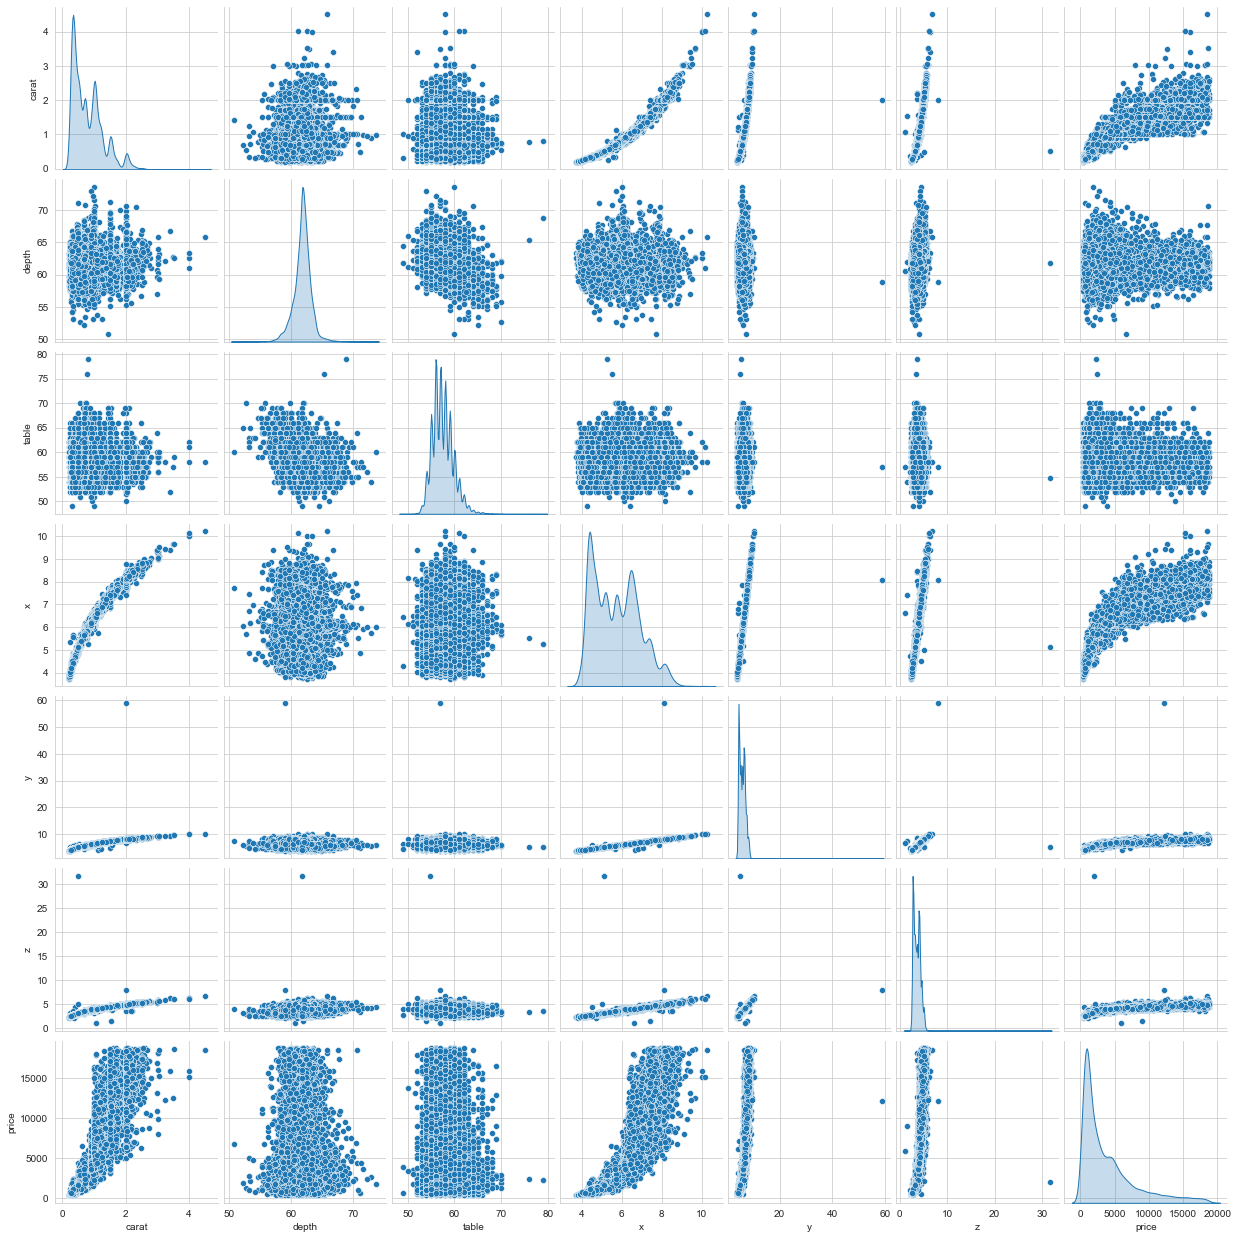

In [44]:
sns.pairplot(data=df,diag_kind='kde')
plt.show()

### Correlation

In [45]:
corr = df.corr()
round(corr,2)

,carat,depth,table,x,y,z,price
carat,1.00,0.03,0.18,0.98,0.94,0.95,0.92
depth,0.03,1.00,-0.29,-0.02,-0.02,0.10,-0.00
table,0.18,-0.29,1.00,0.20,0.18,0.15,0.13
x,0.98,-0.02,0.20,1.00,0.96,0.96,0.89
y,0.94,-0.02,0.18,0.96,1.00,0.93,0.86
z,0.95,0.10,0.15,0.96,0.93,1.00,0.86
price,0.92,-0.00,0.13,0.89,0.86,0.86,1.00


<AxesSubplot:>

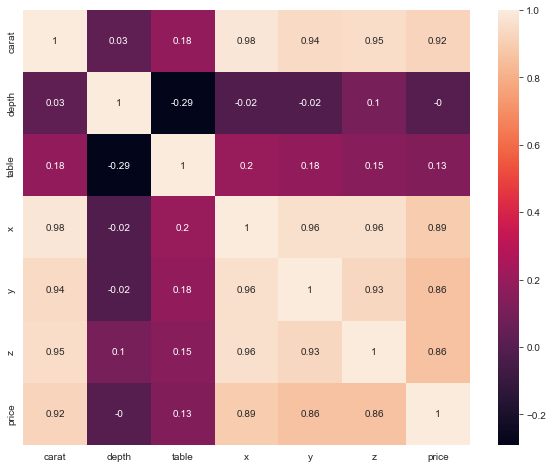

In [46]:
fig_dims = (10, 8)
fig = plt.subplots(figsize=fig_dims)
sns.heatmap(round(corr,2), annot=True)

From the EDA, it is understood that, there is a good correlation among variables 'x','y','z'.

The variables 'x','y','z' also have good correlation with target variable 'price'.

The variable 'carat' has strong correlation with variables 'x','y','z'. It means length, width and height of cubic zirconia stones have direct impact on its carat weight.

Also the variable 'carat' has strong correlation with variable 'price' meaning which more the carat weight of cubic zirconia, more the price of the stones.

The variable 'depth' has weak or almost no correlation with all the variables in the dataset. It means depth of the zirnocia stones has no significance in deciding the price or any other quality of the stones.

# Modelling

In [47]:
X=df.drop(columns=['price']) # Dropping the columns for X 
y=df['price']


# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# check their shape
print('Train shape: ', X_train.shape)
print('Test shape: ', X_test.shape)
print('Train labels shape: ', y_train.shape)
print('Test labels shape: ', y_test.shape)

Train shape:  (21573, 9)
Test shape:  (5394, 9)
Train labels shape:  (21573,)
Test labels shape:  (5394,)


In [48]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60


In [49]:
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 26967, dtype: int64

In [50]:
ohe=OneHotEncoder(sparse=False, handle_unknown='error')
ohe.fit(X[['cut','color','clarity']])  # Using Onehotencoder to handle Categorical values

OneHotEncoder(sparse=False)

In [51]:
ohe.categories_ # Categories Of Onehotencoder

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [52]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [53]:
# Using Column_transformer To automate the encoding process
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_ ),['cut','color','clarity']),
                                      remainder='passthrough') 

## Using Linear Regression Algorithm

In [54]:
lr=LinearRegression() # Calling Linear Regression

In [55]:
# Creating Pipeline which helps us to automated the flow data with encoding and column transforming
pipe=make_pipeline(column_trans,lr)

In [56]:
print("X_train = ",X_train.shape)
print("y_train = ",y_train.shape)
print("X_test = ",X_test.shape)
print("y_test = ",y_test.shape)

X_train =  (21573, 9)
y_train =  (21573,)
X_test =  (5394, 9)
y_test =  (5394,)


In [57]:
# Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
                                                                            array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
                                                                            array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

In [58]:
# Predicting it on X_test 

y_pred=pipe.predict(X_test)

In [59]:
# r2 score (accuracy) on Linear Regression

r2_score(y_test,y_pred)

0.9210512035516675

In [60]:
# Iterating it for 1000 times

scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=i) 
    lr=LinearRegression() # calling the model
    pipe=make_pipeline(column_trans,lr) # using Pipeline
    pipe.fit(X_train,y_train)  # Fitting the model
    y_pred=pipe.predict(X_test) # Predicting X_test
    scores.append(r2_score(y_test,y_pred)) # Appending score in score[]

In [61]:
np.argmax(scores) # Helps us to know which score has a highest accuracy

700

In [62]:
scores[700]

0.9300697039901495

**`Observation`**:-   As, we can see there was no improvement even after iterating it 1000 times. Accuracy remains almost the same

## Using RandomForest Algorithm

In [63]:
rf=RandomForestRegressor(n_estimators=120)                    # Implementing Random Forest Algorithm
                                            

In [64]:
pipe_rf= make_pipeline(column_trans,rf)

In [65]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
                                                                            array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
                                                                            array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=120))])

In [66]:
ypred=pipe_rf.predict(X_test)

In [67]:
r2_score(y_test,ypred)

0.9793637836105131

**`Observation`** :- As we can see Random Forest Regressor works better than Linear Regression where it has r2_score 0.9790884811268792 of  while Linear Regression has r2_score 0.9300697039901495

## Prediction 

In [68]:
# Pipeline used to predict is of Randomforest Regressor with r2_score of 0.9790884811268792

pipe_rf.predict(pd.DataFrame([['0.32','Ideal','F','VVS1',60.4,59,4.35,4.43,2.65]], columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z']))

array([838.08333333])

In [69]:
# Pipeline used to predict is of Randomforest Regressor with r2_score of 0.9790884811268792

pipe_rf.predict(pd.DataFrame([['1.32','Fair','G','VVS1',60.4,59,3.35,4.43,2.65]], columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z']))

array([6730.56666667])

# Final summary:
    
<li>I have performed different techniques for Exploratory Data Analysis using both Univariate and Bivariate/Multi-variate Analysis.</li>

<li>I have also performed Data Wrangling and Pre-Processing where we get to know the nature of the data provided.</li>

<li>In Pre-Processing many techniques are used like outlier detection, missing value detection and also handled them.</li>

<li>Different visualizations and charts are implemented to support the findings of Exploratory Data Analysis.</li>

<li>As it was a Regression problem. We have used regression algorithm like Linear Regression and Random Forest Regressor.</li>

<li>The ensemble model have performed well compared to that of linear Regression.</li>

<li>The best performance is given by Random Forest Regressor with r2_score up to 0.9790884811268792.</li>
 

#### By:- 
#### Name:- Malhar H Jadhav
#### E-mail ID:- jadhav.malhar21@gmail.com
